# *Sampling and Integration - From Gaussians to Maxwell and Boltzmann Distributions*

`Doruk Efe Gökmen -- 01/08/2018 -- Ankara`

## Sampling and Integration

Consider 1D gaussian integral $I$. We calculate it as follows: $I^2=\int^\infty_{-\infty}\frac{\text{d}y}{\sqrt{2\pi}} \int^\infty_{-\infty}\frac{\text{d}x}{\sqrt{2\pi}}e^{-(x^2+y^2)/2}=\int^{2\pi}_0 \frac
{\text{d}\phi}{2\pi}\int^\infty_0 r e^{-r^2/2} \text{d}r = \int^{2\pi}_0 \frac
{\text{d}\phi}{2\pi}\int^1_0 \text{d}\Upsilon=1$. 

The variable transformations indicate a transformation between uniformly distributed random variables $\Upsilon, \phi$ and gaussian distributed random variables $x, y$. Changes of variables in integrals also apply to samples. This is a relation between the integration variables on the exponent of the gaussian and the gaussian distributed random variables.

Populating the interactive namespace from numpy and matplotlib


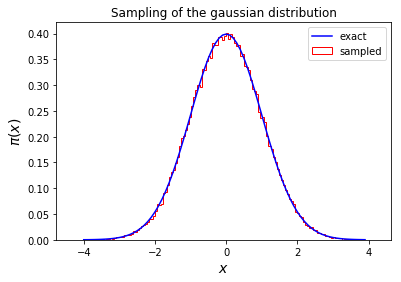

In [91]:
%pylab inline
import random, math, pylab

def gauss_test(sigma):
    #the 2nd transformed random variables are uniformly distributed
    phi = random.uniform(0.0, 2.0 * math.pi) 
    Upsilon = random.uniform(0.0, 1.0)
    #the first transformed variables are
    Psi = - math.log(Upsilon)
    r = sigma * math.sqrt(2.0 * Psi)
    #the original variables
    x = r * math.cos(phi)
    y = r * math.sin(phi)
    return [x, y]

#exact Gaussian distrubution:
list_x = [i * 0.1 for i in xrange(-40, 40)]
list_y = [math.exp(- x ** 2 / 2.0) / (math.sqrt(2.0 * math.pi)) for x in list_x]

#sampled distribution:
n_sampled_pairs = 50000
data = []
for sample in xrange(n_sampled_pairs):
        data += gauss_test(1.0)
#graphics output
pylab.plot(list_x, list_y, color='b', label='exact')
pylab.hist(data, bins=150, normed=True, color='r', histtype='step', label='sampled')
pylab.legend()
pylab.title('Sampling of the gaussian distribution')
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$\pi(x)$', fontsize=14)
pylab.savefig('plot-gauss_test.png')

The plots of independently distributed Gaussian random variables is given below. In the figure, each point is an independent random variable in $x$ and $y$. The resulting 2D distribution is isotropic. The reason for this can be seen in the previous section where we have used the variable transformation to get an integral over angle $\phi$ on the $xy$ plane which can be seen as a randomly distributed number between $0$ and $2\pi$ in the evaluation of the gaussian integral $I$. Hence, this property is unique of gaussian distributions, and is generally valid for gaussians in any dimensions, as the 3 variable case (plotted in the second figure) also suggests so.

Populating the interactive namespace from numpy and matplotlib


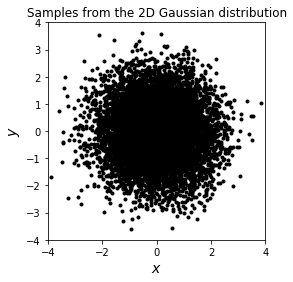

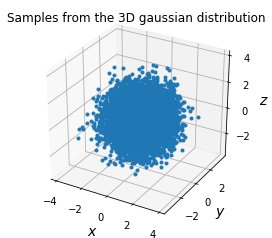

In [15]:
%pylab inline
import random, math, pylab, mpl_toolkits.mplot3d

nsamples = 10000
x_list, y_list, z_list, x_list_n2, y_list_n2, x_list_n3, y_list_n3, z_list_n3 = [], [], [], [], [], [], [], []
for sample in range(nsamples):
    #two gaussian distributed random variables:
    x_list.append(random.gauss(0.0, 1.0))
    y_list.append(random.gauss(0.0, 1.0))
    z_list.append(random.gauss(0.0, 1.0))

#begin graphics output
#2d distribution
pylab.plot(x_list, y_list, color='black', marker='.', linestyle='')
pylab.title('Samples from the 2D Gaussian distribution')
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$y$', fontsize=14)
pylab.xlim(-4.0, 4.0)
pylab.ylim(-4.0, 4.0)
pylab.axes().set_aspect('equal') # set the aspect ratio of the plot
pylab.savefig('plot-gauss_2d.png')

#3d distribution
fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal') # set the aspect ratio of the plot
pylab.plot(x_list, y_list, z_list, '.')
pylab.title('Samples from the 3D gaussian distribution')
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
pylab.show()

Populating the interactive namespace from numpy and matplotlib


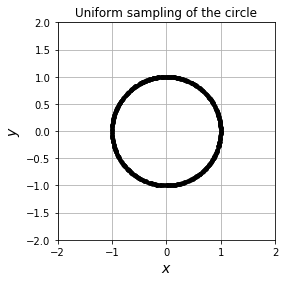

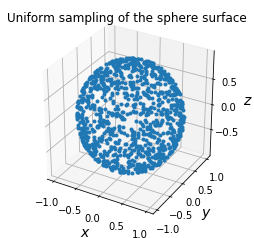

In [257]:
%pylab inline
import random, math, pylab, mpl_toolkits.mplot3d

#we can also give the distribution a "haircut"! Let us normalise each point to a radius equal to 1:
nsamples = 5000
x_list_n2, y_list_n2, x_list_n3, y_list_n3, z_list_n3 = [], [], [], [], []

for sample in xrange(nsamples/5):
    x, y, z = random.gauss(0.0, 1.0), random.gauss(0.0, 1.0), random.gauss(0.0, 1.0)
    radius_2 = math.sqrt(x ** 2 + y ** 2)
    x_list_n2.append(x / radius_2)
    y_list_n2.append(y / radius_2)

    radius_3 = math.sqrt(x ** 2 + y ** 2 + z ** 2)
    x_list_n3.append(x / radius_3)
    y_list_n3.append(y / radius_3)
    z_list_n3.append(z / radius_3)
    
#figure output    
pylab.plot(x_list_n2, y_list_n2, color='black', marker='.', linestyle='')
pylab.title('Uniform sampling of the circle')
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$y$', fontsize=14)
pylab.xlim(-2.0, 2.0)
pylab.ylim(-2.0, 2.0)
pylab.grid()
pylab.axes().set_aspect('equal') # set the aspect ratio of the plot
    
fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
pylab.plot(x_list_n3, y_list_n3, z_list_n3, '.')
pylab.title('Uniform sampling of the sphere surface')
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
pylab.show()

Here, the renormalized distributions indicate that the gaussians are uniformly distibuted on the suface of the (hyper)sphere. We can also directly sample the points inside the 3d sphere of radius 1 as done by the following program.

Populating the interactive namespace from numpy and matplotlib


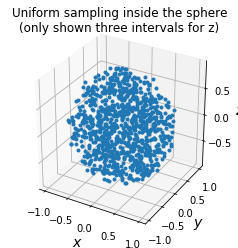

In [7]:
%pylab inline
import random, math, pylab, mpl_toolkits.mplot3d

x_list, y_list, z_list = [],[],[]
nsamples = 1000
for sample in xrange(nsamples):
    x, y, z = random.gauss(0.0, 1.0), random.gauss(0.0, 1.0), random.gauss(0.0, 1.0)
    length = random.uniform(0.0, 1.0) ** (1.0 / 3.0) / math.sqrt(x ** 2 + y ** 2 + z ** 2)
    x, y, z = x * length, y * length, z * length
    #if z < 0.075 and z > -0.075 or z > 0.85 or z < -0.85:
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
# graphics output
fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
pylab.title('Uniform sampling inside the sphere\n(only shown three intervals for z)')
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
pylab.plot(x_list, y_list, z_list, '.')
pylab.show()

The following program distributes the $d$ dimensional gaussian random variables on the surface of the $d$ dimensional hypersphere and calculates the corresponding radii distributions $\pi_d(r)$.

0.42951734083905774
0.46408913359880166
0.4790036671204991
0.4890500521524456


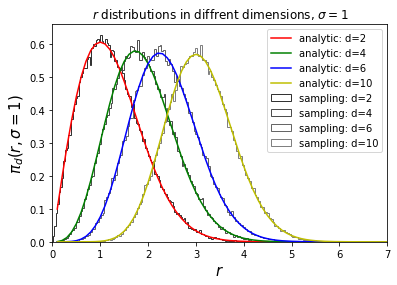

In [266]:
# %pylab inline
import random, math, pylab, numpy

nsamples = 100000

colors = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']
colors2 = ['r','g','b','y','c','m','0.7','0.8','0.9']
i = 0
for dimension in [2,4,6,10]:
    r_samp = []
    i += 1
    #analytic distribution of r
    dd = dimension
    #plot the analytic distribution: a gamma distribution with k=d/2 and theta=2.
    norm = math.gamma(dd / 2) * math.pow(2, (dd / 2)) / 2
    x = [j * 0.1 for j in xrange(1, 400)]
    gamma = [math.pow(r, (dd - 1)) * math.exp(- r ** 2 / 2) / norm for r in x]
    #figure output
    pylab.plot(x, gamma, color=colors2[i-1], label='analytic: d=%.0f' % dd)
    
    #sampling distribution of r
    for sample in range(nsamples):
        R = [random.gauss(0.0, 1.0) for d in range(dimension)] 
        radius = math.sqrt(sum(x ** 2 for x in R))
        r_samp.append(radius)
    print numpy.var(r_samp) #calculate the variances for each dimension

        #print [x / radius for x in R] #print the points that are rescaled to be on the surface of the sphere
    pylab.hist(r_samp, bins=150, normed=True, color=colors[i], histtype='step', label='sampling: d=%.0f' % dimension)
    pylab.legend()
    pylab.xlim(0,7)
    pylab.title('$r$ distributions in diffrent dimensions, $\sigma=1$')
    pylab.xlabel('$r$', fontsize = 15)
    pylab.ylabel('$\pi_d(r,\sigma=1)$', fontsize = 15)
pylab.show()

Using a similar strategy as we did for 1D, one can evaluate an $n$ dimensional gaussian integral by variable transformations and get $1=\left(\frac{1}{\sqrt{2\pi}}\right)^d\int_0^\infty \text{d}r r^{d-1} e^{-r^2/2} \int \text{d}\Omega_d$. Hence we see that the radii $r(d)$ in $d$ dimensions is distributed according to $\pi_d(r)\propto r^{d-1} e^{-r^2/2}$. In other words, the transformed variable square radius $\rho=r^2$ is distributed according to the gamma distirbution $\Gamma(\rho)\propto\rho^{\frac{d-2}{2}}e^{-\rho^2/2}$. This is confirmed by the following program. Furthermore, intriguingly we see that each distribution is approximately centered around  the value $r^2=d$. That means that in order to *re*normalise a gaussian random sample in $d$ dimensions, it is most likely that a successful approach is to rescale it by about an amount $\sqrt{d}$. This implies that in very high dimensions, the renormalising points towards the surface of the unit hypersphare becomes unnecessary if the variance $\sigma$ of the Gaussian was choosen correctly.

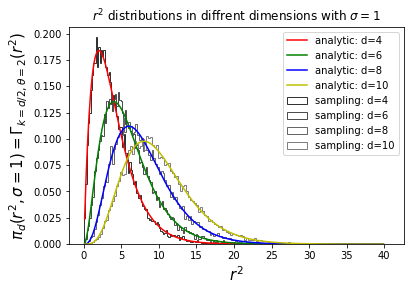

In [265]:
# %pylab inline
import random, math, pylab

nsamples = 20000

colors = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']
colors2 = ['r','g','b','y','c','m','0.7','0.8','0.9']
i = 0
for dimension in [4,6,8,10]:
    i += 1
    
    dd = dimension
    #plot the analytic distribution: a gamma distribution with k=d/2 and theta=2.
    norm = math.gamma(dd / 2) * math.pow(2, (dd / 2))
    x = [j * 0.1 for j in xrange(1, 400)]
    gamma = [math.pow(rho, (dd / 2 - 1)) * math.exp(- rho / 2) / norm for rho in x]
    #figure output
    pylab.plot(x, gamma, color=colors2[i-1], label='analytic: d=%.0f' % dd)
    
    
    r2 = []
    for sample in range(nsamples):
        R = [random.gauss(0.0, 1.0) for d in range(dimension)]
        radius2 = sum(x ** 2 for x in R)
        r2.append(radius2)

        #print [x / radius for x in R] #print the points that are rescaled to be on the surface of the sphere
    #figure output
    pylab.hist(r2, bins=150, normed=True, color=colors[i], histtype='step', label='sampling: d=%.0f' % dimension)
    pylab.legend()
    pylab.title('$r^2$ distributions in diffrent dimensions with $\sigma=1$')
    pylab.xlabel('$r^2$', fontsize = 15)
    pylab.ylabel('$\pi_d(r^2,\sigma=1)=\Gamma_{k=d/2,\\theta=2}(r^2)$', fontsize = 15)
pylab.show()

In this case, we may rescale all points *not* by their actual distance from the origin, but instead by this central (most likely) value of $\sqrt{d}$, i.e. $x_i\rightarrow y_i=x_i\sqrt{d}$. This corresponds to transforming the gaussian distribution as $\pi(x_i)\propto e^{-x_i^2/2}\rightarrow \pi(y_i)\propto e^{-y_i^2/2\sigma^2}=e^{-x_i^2d/2}$, or in other words, taking the variance as $\sigma_x=1\rightarrow\sigma_y=\sqrt{\frac{1}{d}}$. Incredibly, as we increase $d$ the variance decreases, i.e. instead of true renormalisation, if we choose a fixed scaling factor of $\sqrt{d}$ the risk that we have the wrong scaling reduces with increasing number of dimensions!

0.6645927747878635
0.40020680536587616
0.20079653557590216
0.11102109574157934


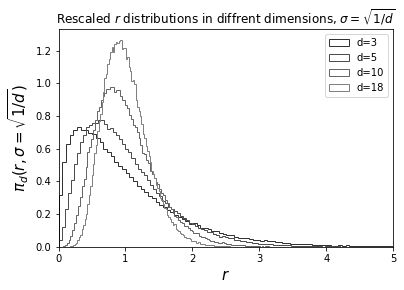

In [264]:
# %pylab inline
import random, math, pylab, numpy

nsamples = 200000

colors = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']
colors2 = ['r','g','b','y','c','m','0.7','0.8','0.9']
i = 0
for dimension in [3,5,10,18]:
    i += 1
    
    #sampling
    r2 = []
    for sample in range(nsamples):
        R = [random.gauss(0.0, math.pow(1.0 / dimension ,1.0/2.0)) for d in range(dimension)]
        radius2 = (sum(x ** 2 for x in R))
        r2.append(radius2)
    print numpy.var(r2) #calculate the variances for each dimension

        #print [x / radius for x in R] #print the points that are rescaled to be on the surface of the sphere
    #figure output
    pylab.hist(r2, bins=150, normed=True, color=colors[i], histtype='step', label='d=%.0f' % dimension)
    pylab.legend()
    pylab.xlim(0,5)
    pylab.title('Rescaled $r$ distributions in diffrent dimensions, $\sigma=\sqrt{1/d}$')
    pylab.xlabel('$r$', fontsize = 15)
    pylab.ylabel('$\pi_d(r,\sigma=\sqrt{1/d})$', fontsize = 15)
pylab.show()

For a given kinetic energy $E_k$, the speeds of $N$ particles are constrained by the equation $E_k=\frac{m}{2}\sum_{i=0}^{N-1}v_i^2$, where e.g. in d dimensions, the speed is given in terms of the two components as $v_i^2=\sum_{j=1}^{d}(v_i^j)^2$, where $d$ is either $1$, $2$ or $3$. Therefore, the energy constraint implies that a legal set of velocities is a point on the surface of the $dN$ dimensional hypersphere of radius $r=\sqrt{\frac{2E_k}{m}}$. Hence the problem of finding the velocity distribution of a statistical ensemble is reduced to sampling a random point on the surface of a hypersphere.

On the other hand, since an ensemble contains about $6\times 10^{23}$ of particles, what we have is an hypersphere of a very large number of dimensions. Following the previous argument, for a sampled velocity component $v_i^j$, the suitable fixed scaling towards the surface of the hypersphere of radius $\sqrt{\frac{2E_k}{m}}$ is $\sqrt{\frac{2E_k}{mdN}}$ with certainty approaching to absolute as $N\rightarrow \infty$. (Please note that this implies that the kinetic energy is uniformly partitioned and distributed equally to each degree of freedom, i.e. to each velocity component of each particle.) In other words, instead of sampling velocities as gaussian variables each with variance $\sigma=1$, if we choose a variance that scales each velocity towards the surface of the kinetic energy hypersphere, then the probability that we are mistaken on the value a specific velocity component decreases by increasing $N$!

If we take the mean energy per degree of freedom at a given temperature $T$ as $\frac{E_k}{dN}=\frac{1}{2}k_BT$, where $k_B$ is the Boltzmann constant, we therefore arrive at the celebrated Maxwell velocity distribution $\pi(v_x)dv_x=\sqrt{\frac{m}{2\pi k_BT}}\exp{\left(-\frac{1}{2}\frac{mv_x^2}{k_B T}\right)}dv_x$. The speed distributions clearly have the gamma profiles similar to the ones shown previously. The equally famous Boltzmann distribution for energies $\pi(E)\propto\exp{\left(-\frac{E}{k_BT}\right)}$ is also readily obtained as a result of this approach.

## Sampling discrete and continuous 1D distributions

A naive random number generator (NRNG): congruential linear random number generator.

Observe that $\text{idum}\in [0,m-1]$ because of the $\mod{m}$ operation. The method generates an erratic sequence which can contain all integers $\in [0,m-1]$. For a seed equal to e.g. 1000, the NRNG yields the same sequence of numbers at each run. However, if we set the initial seed "idum" to e.g. the system time, then the sequence of random numbers is different at every run.

Note that the output of the program is periodic, if you hit a number a certain time, you'll generate the same sequence as you did the first time. The program generates the same numbers it generated before.

In [3]:
m = 134456 #mode
n = 8121
k = 28411
idum = 1000 #seed (initial integer value)
for iteration in xrange(200000):
    idum = (idum *  n + k) % m #modulo operation (fold back to the range given by m) "congruential"
    ran = idum / float(m) #divide by m to obtain a "random" number between 0 and 1.
    #print idum, ran, iteration

### Rejection sampling

Direct sampling of discrete and one-dimensional continuous systems is an important subject.

Here we sample  1D gaussian distribution through Markov-chain rejection sampling. (Calculating the area under the gaussian with the same method that is used in the calculation of $\pi$ in the first week.)

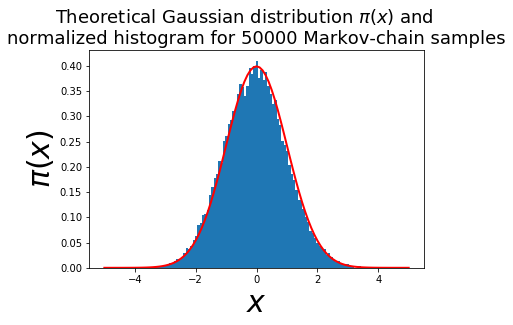

In [129]:
import random, math, pylab

x = 0.0 #start at x=0
delta = 0.5 #maximum step size
data = []
for k in range(50000):
    x_new = x + random.uniform(-delta, delta) #propose a random move with step size between \pm delta
    
    #if the randomly generated number between 0 and 1 is less than the acceptance rate, then accept the sample
    if random.uniform(0.0, 1.0) <  \
         math.exp (- x_new ** 2 / 2.0) / math.exp (- x ** 2 / 2.0): #acceptance rate 
        x = x_new 
    data.append(x)

pylab.hist(data, 100, normed = 'True') #histogram of the sample
x = [a / 10.0 for a in range(-50, 51)]
y = [math.exp(- a ** 2 / 2.0) / math.sqrt(2.0 * math.pi) for a in x]
pylab.plot(x, y, c='red', linewidth=2.0)
pylab.title('Theoretical Gaussian distribution $\pi(x)$ and \
    \nnormalized histogram for '+str(len(data))+' Markov-chain samples', fontsize = 18)
pylab.xlabel('$x$', fontsize = 30)
pylab.ylabel('$\pi(x)$', fontsize = 30)
pylab.savefig('plot_markov_gauss.png')
pylab.show()

Let us do the same sampling by direct sampling on a limited range given by a rectangle. (Note that we have to introduce an inelegant cutoff $\pm x_\text{cut}$ for the $x$ range of the rectangle.)

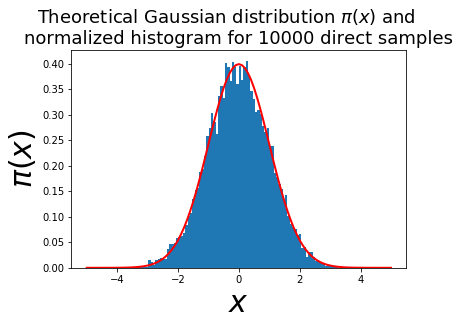

In [144]:
import random, math

y_max = 1.0 / math.sqrt(2.0 * math.pi)
x_cut = 5.0
n_data = 10000
n_accept = 0
data = []
while n_accept < n_data:
    #select a random position within the rectangle
    y = random.uniform(0.0, y_max)
    x = random.uniform(-x_cut, x_cut)
    if y < math.exp( - x **2 / 2.0)/math.sqrt(2.0 * math.pi): #check whether the sample is below the gaussian curve
        n_accept += 1
        data.append(x)
        
pylab.hist(data, 100, normed = 'True') #histogram of the sample
x = [a / 10.0 for a in range(-50, 51)]
y = [math.exp(- a ** 2 / 2.0) / math.sqrt(2.0 * math.pi) for a in x]
pylab.plot(x, y, c='red', linewidth=2.0)
pylab.title('Theoretical Gaussian distribution $\pi(x)$ and \
    \nnormalized histogram for '+str(len(data))+' direct samples', fontsize = 18)
pylab.xlabel('$x$', fontsize = 30)
pylab.ylabel('$\pi(x)$', fontsize = 30)
pylab.savefig('plot_direct_gauss.png')
pylab.show()

 Rejection sampling can be problematic It is not due to the presence of rejections per se, but because the rejection rate can become really enormous, even prohibitive. To see this, let us look at a function that is not quite as friendly as a Gaussian distribution: the distribution $\pi(x)=\frac{2}{\sqrt{x}}$. Here, we do not know what box size to choose: what should $x_\text{cut}$ be? With increasing $x_\text{cut}$, the rejection rate will increase enormously!
 
 Below we compare the results from direct sampling with a cut-off and Markov-chain sampling methods.

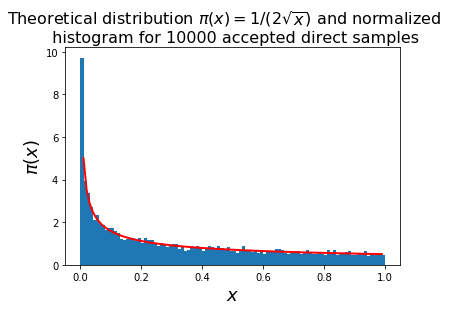

In [135]:
import random, math, pylab

y_max = 100.0
x_cut = 1.0
n_data = 10000
data = []
n_accept = 0
while n_accept < n_data: 
    y = random.uniform(0.0, y_max)
    x = random.uniform(0.0, x_cut)
    if y < 1.0 / (2.0 * math.sqrt(x)):
        n_accept += 1
        data.append(x)

pylab.hist(data, bins=100, normed='True')
x = [a / 100.0 for a in xrange(1, 100)]
y = [1.0 / (2.0 * math.sqrt(a)) for a in x]
pylab.plot(x, y, 'red', linewidth = 2)
pylab.title('Theoretical distribution $\pi(x)={1}/{(2 \sqrt{x})}$ and normalized\
    \n histogram for '+str(n_accept)+' accepted direct samples',fontsize=16)
pylab.xlabel('$x$', fontsize=18)
pylab.ylabel('$\pi(x)$', fontsize=18)
pylab.show()

2.2360679775 0.2 0
4.911152595 0.0414603671158 21
7.58973327104 0.0173598901546 68
11.3758766412 0.00772734410312 196
14.7582356921 0.00459125184976 369
29.4346418263 0.00115420377131 930
32.9788774849 0.000919450305395 3647
46.9006508302 0.000454613429938 6548
106.487244559 8.81870512329e-05 8023
122.781918606 6.63332336615e-05 8855


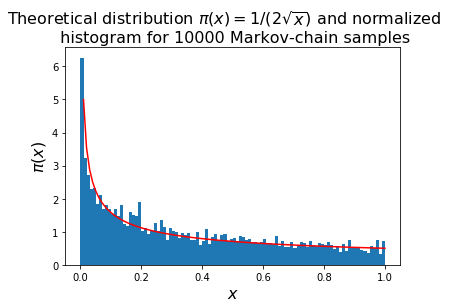

In [134]:
import random, math, pylab

x = 0.2
delta = 0.5
data = []
y_max = 0
n_trials = 10000
for k in xrange(n_trials):
    x_new = x + random.uniform(-delta, delta)
    if x_new > 0.0 and x_new < 1.0:
        if random.uniform(0.0, 1.0) < math.sqrt(x) / math.sqrt(x_new): 
            x = x_new 
    if 1.0 / math.sqrt(x) > y_max: 
         y_max =  1.0 / math.sqrt(x)
         print y_max, x, k #print the maximum y values and their x values
    data.append(x)

pylab.hist(data, bins=100, normed='True')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$\pi(x)$', fontsize=16)
x = [a / 100.0 for a in xrange(1, 101)]
y = [0.5 / math.sqrt(a) for a in x]
pylab.plot(x, y, linewidth=1.5, color='r')
pylab.title('Theoretical distribution $\pi(x)={1}/{(2 \sqrt{x})}$ and normalized\
    \n histogram for '+str(len(data))+' Markov-chain samples',fontsize=16)
pylab.show()

### Discrete distributions

Here we discuss rejection free discrete sampling algorithms.

#### Tower sampling

The tower sampling is **rejection free** but has logarithmic computational complexity and this is not optimal.

In [ ]:
import random

# bisection search to find the bin corresponding to eta
def bisection_search(eta, w_cumulative):
    kmin = 0
    kmax = len(w_cumulative)
    while True:
        k = int((kmin + kmax) / 2)
        if w_cumulative[k] < eta:
            kmin = k
        elif w_cumulative[k - 1] > eta:
            kmax = k
        else:
            return k - 1

# sample an integer number according to weights
def tower_sample(weights):
    sum_w = sum(weights)
    w_cumulative = [0.0]
    for l in xrange(len(weights)):
        w_cumulative.append(w_cumulative[l] + weights[l])
    eta = random.random() * sum_w
    sampled_choice = bisection_search(eta, w_cumulative)
    return sampled_choice

weights = [0.4, 0.3, 0.8, 0.1, 0.2]
n_samples = 20
for sample in xrange(n_samples):
    print tower_sample(weights)s

#### Walker's algorithm

Optimal.

[(0.05, 4, 3), (0.09999999999999998, 3, 1), (0.1, 2, 1), (0.17999999999999997, 1, 0), (0.19999999999999998, 0, 0)]


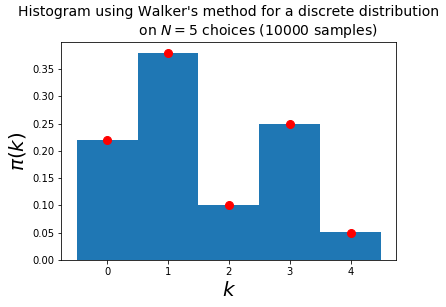

In [137]:
import random, pylab
 
N = 5
pi = [[1.1 / 5.0, 0], [1.9 / 5.0, 1], [0.5 / 5.0, 2], [1.25 / 5.0, 3], [0.25 / 5.0, 4]]
x_val = [a[1] for a in pi]
y_val = [a[0] for a in pi]
pi_mean = sum(y_val) / float(N)
long_s = []
short_s = []
for p in pi:
    if p[0] > pi_mean:
        long_s.append(p)
    else:
        short_s.append(p)
table = []
for k in range(N - 1):
    e_plus = long_s.pop()
    e_minus = short_s.pop()
    table.append((e_minus[0], e_minus[1], e_plus[1]))
    e_plus[0] = e_plus[0] - (pi_mean - e_minus[0])
    if e_plus[0] < pi_mean:
        short_s.append(e_plus)
    else:
        long_s.append(e_plus)
if long_s != []: 
    table.append((long_s[0][0], long_s[0][1], long_s[0][1]))
else: 
    table.append((short_s[0][0], short_s[0][1], short_s[0][1]))
print table
samples = []
n_samples = 10000
for k in xrange(n_samples):
    Upsilon = random.uniform(0.0, pi_mean)
    i = random.randint(0, N-1)
    if Upsilon < table[i][0]:
        samples.append(table[i][1])
    else: samples.append(table[i][2])

pylab.figure()
pylab.hist(samples, bins=N, range=(-0.5, N-0.5), normed=True)
pylab.plot(x_val, y_val,'ro', ms=8)
pylab.title("Histogram using Walker's method for a discrete distribution\n\
             on $N=$"+str(N)+" choices ("+str(n_samples)+" samples)",fontsize=14)
pylab.xlabel('$k$',fontsize=20)
pylab.ylabel('$\pi(k)$',fontsize=20)
pylab.show()

### Continuous distributions

Let us investigate the continuum limit of tower sampling method. 

For instance, for a **gaussian distribution** $\pi(x) \propto e^{-x^2}$, to obtain the position corresponding to a particular value $\Upsilon$ of the cumulative probability distribution $\Phi(x)\equiv \int^x_{-\infty}dx'\pi(x')$, we need to calculate the inverse of the *error function* $\text{erf}{(2\Phi-1)}$ which cannot be obtained analytically.

Below we pick a random value on the "tower" (i.e. we choose a value $\Upsilon$ of the cumulative distribution), and find the position that it corresponds to by numerically inverting the error function. The sampling is given as a histrogram. 

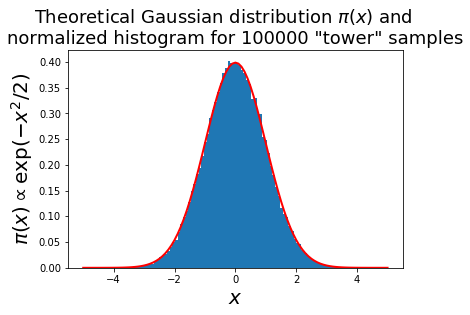

In [215]:
import scipy.special, random, math

n_trials = 100000
data = []
for trial in xrange(n_trials):
    Upsilon = random.uniform(0.0, 1.0) #pick a value for the cumulative distribution (or a value on the tower)
    x = math.sqrt(2.0) * scipy.special.erfinv(2.0 * Upsilon - 1.0) #calculate x's from the numerical inverse of erf(x)
    data.append(x)
    
pylab.hist(data, 100, normed = 'True') #histogram of the sample
x = [a / 10.0 for a in range(-50, 51)]
y = [math.exp(- a ** 2 / 2.0) / math.sqrt(2.0 * math.pi) for a in x]
pylab.plot(x, y, c='red', linewidth=2.0)
pylab.title('Theoretical Gaussian distribution $\pi(x)$ and \
    \nnormalized histogram for '+str(len(data))+' "tower" samples', fontsize = 18)
pylab.xlabel('$x$', fontsize = 20)
pylab.ylabel('$\pi(x)\propto\exp{(-x^2/2)}$', fontsize = 20)
pylab.savefig('plot_tower_gauss.png')
pylab.show()

Let us now consider a **divergent distribution** $\pi(x)\propto x^\gamma$, $0<x\leq1$. For $\gamma < 0$, $\pi(x)$ blows up at $x=0$. However we have a finite cumulative distribution $\Phi(x)= x^{\gamma+1}$

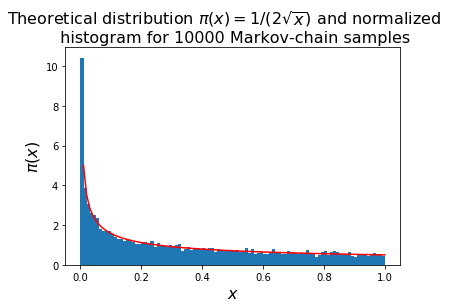

In [146]:
import random

gamma = -0.5
n_trials = 10000
data = []

for trial in xrange(n_trials):
    x = (random.uniform(0.0, 1.0)) ** (1.0 / (gamma + 1.0)) #simply invert the cumulative distribution
    data.append(x)

pylab.hist(data, bins=100, normed='True')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$\pi(x)$', fontsize=16)
x = [a / 100.0 for a in xrange(1, 101)]
y = [0.5 / math.sqrt(a) for a in x]
pylab.plot(x, y, linewidth=1.5, color='r')
pylab.title('Theoretical distribution $\pi(x)={1}/{(2 \sqrt{x})}$ and normalized\
    \n histogram for '+str(len(data))+' Markov-chain samples',fontsize=16)
pylab.show()

We found great rejection-free sampling programs for discrete and continuous one-dimensional distributions, and solved the direct sampling problem in these cases. Markov chain methods could generally be avoided. The situation is much more complicated in high-dimensional situations for example the hard-spheres simulations that we did last week or the quantum problem that we will turn our attention to next week. 

## Calculation of High Dimensional Integrals Using Monte Carlo Methods

### Volume of the $d$-dimensional unit hypersphere $V_\text{sph}(d)$

![caption](fig/sphere_facts.png)

We know *a priori* that the volume of the $d$-dimensional hypersphere ($d$-sphere) of radius $r$ is proportional to $r^{d}$, i.e. $V_d(r) \equiv V_\text{sph}(r,d)\propto r^{d}$. It follows that the surface area is given by $S_d(r)\equiv S_\text{sph}(r,d)=\frac{\text{d}V_\text{sph}(r,d)}{\text{d}r}=dC_nr^{d-1}$. Therefore, the task of calculating the volume is reduced to finding the proportionality constant $C_d$. If we consider $V_d(r\rightarrow \infty)$, by transforming the cartesian to the spherical coordinates $V_d(r\rightarrow \infty) = \int_0^{r \rightarrow \infty} \frac{\text{d}V_\text{sph}(d)}{\text{d}r'} \text{d}r' = C_d d \int_0^{r \rightarrow \infty} r'^{d-1} \text{d}r' = \int_{-\infty}^\infty \int_{-\infty}^\infty \cdots \int_{-\infty}^\infty \text{d}x_0\text{d}x_1 \cdots\text{d}x_{d-1} = \int \text{d}\Omega_d \int_{0}^\infty \text{d}r $, where $\text{d}\Omega_d$ is the $d$ dimensional solid angle differential, we get an integral relation given by $C_d d \int_0^{r \rightarrow \infty} r'^{d-1} \text{d}r' = \int \text{d}\Omega_d\int_{0}^\infty \text{d}r $.

Alternatively we consider the gaussian $e^{-r^2}$, where $r^2=x_0^2+\cdots+x_{d-1}^2$. We than have $I^d  = \left( \int_{-\infty}^\infty e^{-x^2} \text{d}x \right)^d = \int \text{d}\Omega_d \int_{0}^\infty e^{-r^2} \text{d}r = C_d d \int_0^\infty r^{d-1}e^{-r^2} \text{d}r$ by the above equality. Hence it follows that $C_d=\frac{\left( \int_{-\infty}^\infty e^{-x^2} \text{d}x \right)^d}{d \int_0^\infty r^{d-1}e^{-r^2} \text{d}r}=\frac{2\pi^{d/2}}{\Gamma(d/2)}=\frac{2\pi^{d/2}}{\left(\frac{d}{2}-1\right)!}$. Using this, finally obtain the result that we were after: $S_d(r)=\frac{2\pi^{d/2}r^{d-1}}{\left(\frac{d}{2}-1\right)!}$ and $V_d(r)=\int_0^r S_d(r') \text{d}r' = \frac{\pi^{d/2}r^d}{\left(\frac{d}{2}\right)!}$. Therefore the volume of the unit $d$-sphere is $V_d(r=1) = V_\text{sph}(d) = \frac{\pi^{d/2}}{\left(\frac{d}{2}\right)!}$.

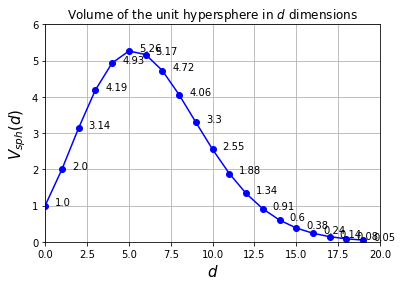

In [375]:
import math, pylab
from pylab import MaxNLocator

volume, dimension = [], []

def V_sph(dim):
    return math.pi ** (dim / 2.0) / math.gamma(dim / 2.0 + 1.0)

for d in range(0,20):
    dimension.append(d)
    volume.append(V_sph(d))

pylab.plot(dimension, volume, 'bo-')
pylab.title('Volume of the unit hypersphere in $d$ dimensions')
pylab.xlabel('$d$', fontsize = 15)
pylab.ylabel('$V_{sph}(d)$', fontsize = 15)
pylab.xlim(0,20)
pylab.ylim(0,6)
for i in range(0,20):
    pylab.annotate(round(volume[i],2), (dimension[i], volume[i]), xytext=(10, 0), ha='left',
                textcoords='offset points')
pylab.grid()
pylab.show()

Although we are indeed able to calculate the exact expression, since the calculation of the gamma function $\Gamma(d)$ is difficult for large $d$, it is not entirely pointless to develop a numerical approach for this problem. We can numerically calculate $V_\text{sph}(d)$ from the ratio between the volumes of unit hyperspheres in successive dimensions $d$, $d+1$.

We first calculate $\langle Q(d=3) \rangle$ by a Markov-chain Monte Carlo program that samples points $(x, y, z)$ inside the unit cylinder and counts the samples that land inside the unit sphere, as well.

We see that the obtained value agrees with the analytical value of $Q(3)=\frac{4}{3}$ (see the table above).

In [1]:
import random

x, y, z = 0.0, 0.0, 0.0 #initial point
delta = 0.1
Q_avg_3 = 0.0 #initialise the average Q(3)
Q_3 = 4.0 / 3.0

n_trials = 4000
n_runs = 1000

for j in range(n_runs):
    n_hits = 0
    for i in range(n_trials):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if (x + del_x) ** 2 + (y + del_y) ** 2 < 1.0: #sample points inside the unit disk  
            x, y = x + del_x, y + del_y
        z = random.uniform(-1.0, 1.0) #sample the z coordinate (inside the unit cylinder)

        #raise the number of counts if the sample is also inside the unit sphere
        if x**2 + y**2 + z**2 < 1.0: n_hits += 1 
    Q_avg_3 += 2.0 * n_hits / float(n_trials) / n_runs #take the average
        
print '<Q(3)> =', Q_avg_3
print '<Q(3)>/Q(3)=<Q(3)>/(4/3) =', Q_avg_3 / Q_3 #compare with the actual value

<Q(3)> = 1.33341
<Q(3)>/Q(3)=<Q(3)>/(4/3) = 1.0000575


Now we do the same for $\langle Q(4) \rangle$ by a straightforward tweak:

In [4]:
import random, math

x, y, z, t = 0.0, 0.0, 0.0, 0.0 #initial point
delta = 0.1
Q_avg_4 = 0.0 #initialise the average Q(4)
Q_4= 3.0 * math.pi / 8.0

n_trials = 4000
n_runs = 1000

for j in range(n_runs):
    n_hits = 0
    for i in range(n_trials):
        del_x, del_y, del_z = random.uniform(-delta, delta), random.uniform(-delta, delta), random.uniform(-delta, delta)
        if (x + del_x)**2 + (y + del_y)**2 + (z + del_z)**2 < 1.0: #sample points inside the unit sphere  
            x, y, z = x + del_x, y + del_y, z + del_z
        t = random.uniform(-1.0, 1.0) #sample the t coordinate (inside the unit cylinder)

        #raise the number of counts if the sample is also inside the unit hypersphere
        if x**2 + y**2 + z**2 + t**2 < 1.0: n_hits += 1 
    Q_avg_4 += 2.0 * n_hits / float(n_trials) / n_runs #take the average
        
print '<Q(4)> =', Q_avg_4
print '<Q(4)>/Q(4) =', Q_avg_4 / Q_4 #compare with the actual value

 <Q(4)> = 1.175211
<Q(4)>/Q(4) = 0.997550079072


Obtain the volume of the 4-sphere $V_\text{sph}(4)$ from $\langle Q(4) \rangle$:

In [386]:
print 'Analytical: V_sph(4) = pi^2/2 =', math.pi**2 / 2 #analytical
print 'Numerical: V_sph(3)⋅<Q_4> =', 4.0 / 3.0 * math.pi * Q_avg_4
print 'Numerical: V_sph(2)⋅<Q_3>⋅<Q_4> = pi⋅<Q_3>⋅<Q_4> =', math.pi * Q_avg_3 * Q_avg_4

Analytical: V_sph(4) = pi^2/2 = 4.93480220054
Numerical: V_sph(3)⋅<Q_4> = 4.92681524536
Numerical: V_sph(2)⋅<Q_3>⋅<Q_4> = pi⋅<Q_3>⋅<Q_4> = 4.93103198336


Let us now efficiently generalise this program to sample uniformly distributed points inside the $d$-dimensional unit sphere, and calculate $\langle Q(d)\rangle$. Note that, here, instead of modifying all components of x at a time, as we did previously, modify only one component at each iteration $i$ (with $i=0, 1, 2,\cdots, n_\text{trials}$).

As seen previously, for small radii, e.g. $0<r<1$, the distribution of radii $\pi(r)$ is proportional to $r^{d-1}$ in random sampling inside the $d$-sphere. In the following, we verify our generalised program for $d=4$, $20$ by comparing the radius histograms with the analytic approximation to the radii distributions respectively given by $\pi_4(r) \approx 4 r ^3$ and $\pi_{20}(r) \approx 20 r ^{19}$ for small $r$.

Populating the interactive namespace from numpy and matplotlib
Analytical: Q(d=4) 1.1780972451
Numerical: <Q(d=4)> = 1.186448


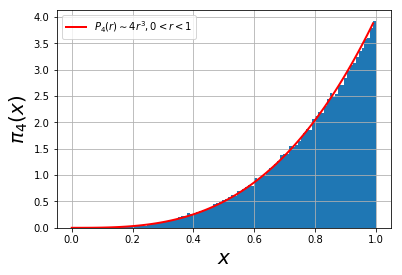

Analytical: Q(d=20) 0.553539364154
Numerical: <Q(d=20)> = 0.551448


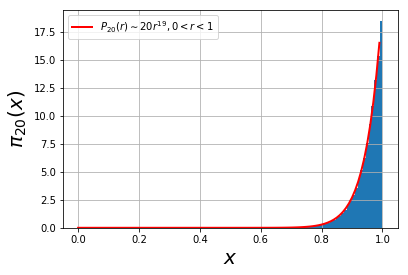

Analytical: Q(d=200) 0.177023967696
Numerical: <Q(d=200)> = 0.17836


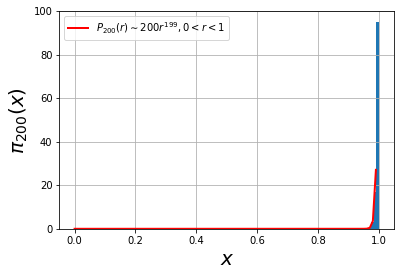

In [159]:
%pylab inline
import pylab, random, math

#analytical formulae:
def V_sph(dim): #volume of "dim" dimensional sphere
    return math.pi ** (dim / 2.0) / math.gamma(dim / 2.0 + 1.0)
def Q(dim):
    return V_sph(dim) / V_sph(dim-1)

#monte carlo algorithm:
def markov_sphere(d, n_runs, n_trials):
    x = [0.0] * d #initial point
    delta = 0.1
    Q_avg_d = 0 #initialise the average Q(d)
    old_radius_square = sum(i**2 for i in x) 
    data = []
    for j in range(n_runs):
        n_hits = 0
        if d == 1:
            Q_avg_d = 1 
            break
        for i in range(n_trials):
            k = random.randint(0, d - 2)
            x_old_k = x[k]
            x_new_k = x_old_k + random.uniform(-delta, delta)  
            new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
            if new_radius_square < 1.0: #check whether the position is inside the unit (d-1)-sphere
                old_radius_square = new_radius_square #update the radius
                x[k] = x_new_k #update a component
                x[d-1] = random.uniform(-1, 1) #sample the d'th coordinate (inside the unit cylinder)                
            if old_radius_square + x[d-1]**2 < 1.0: #is x inside the unit d-sphere?
                n_hits += 1 #raise the number of hits in case of accepted sample                                
                data.append(math.sqrt(old_radius_square  + x[d-1]**2)) #generate the radius histogram data
                
        Q_avg_d += 2.0 * n_hits / float(n_trials) / n_runs #take the average of Q's
        
    print 'Analytical: Q(d=%i)' % d, Q(d)
    if d != 1:
        print 'Numerical: <Q(d=%i)> =' % d, Q_avg_d 
    else:
        print 'There is no cylinder in 1 dimension!'
    return Q_avg_d, data

n_trials = 500
n_runs = 500

# 4-dimensional sphere radius distribution
Q_avg_d, data = markov_sphere(4, n_trials, n_trials)
pylab.hist(data, 100, normed = 'True') #histogram of the sample
x = [a / 100.0 for a in range(0, 100)]
y = [4 * a**3 for a in x]
pylab.plot(x, y, c='red', linewidth=2.0, label='$P_4(r) \sim 4 r^3, 0<r<1$')
pylab.xlabel('$x$', fontsize = 20)
pylab.ylabel('$\pi_4(x)$', fontsize = 20)
pylab.legend()
pylab.grid()
pylab.savefig('plot_radius_4.png')
pylab.show()

# 20-dimensional sphere radius distribution
Q_avg_d, data = markov_sphere(20, n_trials, n_trials)
pylab.hist(data, 100, normed = 'True') #histogram of the sample
x = [a / 100.0 for a in range(0, 100)]
y = [20 * a**19 for a in x]
pylab.plot(x, y, c='red', linewidth=2.0, label='$P_{20}(r) \sim 20 r^{19}, 0<r<1$')
pylab.xlabel('$x$', fontsize = 20)
pylab.ylabel('$\pi_{20}(x)$', fontsize = 20)
pylab.legend()
pylab.grid()
pylab.savefig('plot_radius_20.png')
pylab.show()

# 200-dimensional sphere radius distribution
Q_avg_d, data = markov_sphere(200, n_trials, n_trials)
pylab.hist(data, 100, normed = 'True') #histogram of the sample
x = [a / 100.0 for a in range(0, 100)]
y = [200 * a**199 for a in x]
pylab.plot(x, y, c='red', linewidth=2.0, label='$P_{200}(r) \sim 200 r^{199}, 0<r<1$')
pylab.xlabel('$x$', fontsize = 20)
pylab.ylabel('$\pi_{200}(x)$', fontsize = 20)
pylab.legend()
pylab.grid()
pylab.savefig('plot_radius_200.png')
pylab.show()

We have now reached to the point where we can numerically calculate $V_\text{sph}(n)=Q(n) \cdots Q(3)Q(2) = 2 Q(n) \cdots Q(3)Q(2)$ for any dimension $n$ through successive calculations of $Q(d)$, $d\in [2,n]$.

In [8]:
import random, math

#Calculate the volume of the d_max dimensional sphere through the formula V(n)=Q(n)...Q(2)V(2)
def V_sph_markov(dim, n_runs, n_trials):
    V = []
    V_d = V_sph(1) #initialise the volume of "d_max" dimensional sphere
    print 'The analytical value for the volume of the unit %i-sphere is =' % dim, V_sph(dim), '.'
    print '___________________________________________'
    for d in range(1, dim + 1):
        Q_avg_d, data = markov_sphere(d, n_runs, n_trials)
        V_d *= Q_avg_d
        V.append(V_d) #save the volume for each d value along the way until d_max
        print 'Analytical: V_sph(d=%i)' % d, V_sph(d)
        print 'Numerical: V_sph(d=%i)' % d, V_d
        print '___________________________________________'
    print 'After %i runs' % n_runs, 'each consisting of %i trials' % n_trials, ', the numerical result for the volume of the unit %i-sphere (with analytical value' % dim, V_sph(dim), ') is found to be', V_d, '.'
    return V

d_max = 200 #maximum dimension (dimension of the sphere in question)
n_trials = 1000 #each dimension iteration takes "n_trials" number of iterations
n_runs = 500
V = V_sph_markov(d_max, n_runs, n_trials)

The analytical value for the volume of the unit 200-sphere is = 5.55883284203e-109 .
___________________________________________
Analytical: Q(d=1) 2.0
There is no cylinder in 1 dimension!
Analytical: V_sph(d=1) 2.0
Numerical: V_sph(d=1) 2.0
___________________________________________
Analytical: Q(d=2) 1.57079632679
Numerical: <Q(d=2)> = 1.567504
Analytical: V_sph(d=2) 3.14159265359
Numerical: V_sph(d=2) 3.135008
___________________________________________
Analytical: Q(d=3) 1.33333333333
Numerical: <Q(d=3)> = 1.33864
Analytical: V_sph(d=3) 4.18879020479
Numerical: V_sph(d=3) 4.19664710912
___________________________________________
Analytical: Q(d=4) 1.1780972451
Numerical: <Q(d=4)> = 1.172344
Analytical: V_sph(d=4) 4.93480220054
Numerical: V_sph(d=4) 4.91991405849
___________________________________________
Analytical: Q(d=5) 1.06666666667
Numerical: <Q(d=5)> = 1.058728
Analytical: V_sph(d=5) 5.26378901391
Numerical: V_sph(d=5) 5.20885077132
_________________________________________

As the following plot indicates, the Monte Carlo algorithm is able to calculate the volume of hyperspheres with exceptional accuracy up to very high dimensions.

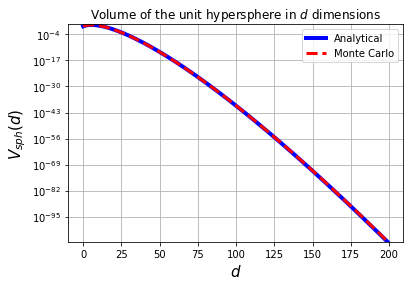

In [11]:
import pylab

volume, dimension = [], []

for d in range(0,200):
    dimension.append(d)
    volume.append(V_sph(d))

pylab.semilogy(dimension, volume, 'b', label='Analytical', linewidth=4.0)
pylab.semilogy(dimension, V, 'r--', label='Monte Carlo', linewidth=3.0)
pylab.title('Volume of the unit hypersphere in $d$ dimensions')
pylab.xlabel('$d$', fontsize = 15)
pylab.ylabel('$V_{sph}(d)$', fontsize = 15)
pylab.ylim(0,10)
pylab.legend()
pylab.grid()
pylab.savefig('hypersphere_volumes.png')
pylab.show()

In [164]:
import sys, os

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

#Error calculation:
d = 20 #dimension of the sphere
n_runs = 10
Error = []
trials = [10, 100, 1000, 10000, 100000]

for trial in trials:
    V_avg, V_avg_square = 0.0, 0.0
    for run in range(n_runs):
        with HiddenPrints():
            v = V_sph_markov(d, 1, trial)
        V_avg += v[d-1] / n_runs
        V_avg_square += v[d-1] ** 2.0 / n_runs
    print V_avg
    Error.append(math.sqrt(V_avg_square - V_avg ** 2) / pow(n_runs, 0.5))   
print Error
Dif = [] * len(trials)
for i in range(len(trials)):
    Dif.append(abs(Error[i] - V_sph(d)))
print Dif

910059.1104
160100.804858
1.6837129243
0.0445860220085
0.0271548828196
[31358.716731116598, 13488.652683320564, 0.30053926397132036, 0.0030817988258178227, 0.0006134494292910471]
